Please See The end for comprehensive summary

# **Data Loading and preparation**

In [73]:
%pip install pycaret --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [74]:
%pip install mlflow --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
import mlflow

In [76]:
df = pd.read_excel("C:\\Users\\home\\OneDrive\\Desktop\\JJ DATA\\1dec - 31st march (1).xlsx")
df.head()
df1 = df.copy()

In [77]:
df['post_date'] = pd.to_datetime(df['post_date'], errors='coerce')
df['weekday'] = df['post_date'].dt.day_name()

# Convert post_time to datetime format and categorize into 2-hour bins
df['post_time'] = pd.to_datetime(df['post_time'], format='%H:%M:%S', errors='coerce').dt.hour
df['time_bin'] = (df['post_time'] // 2) * 2
time_bin_labels = [f"{i:02d}-{i+2:02d}" for i in range(0, 24, 2)]
df['time_bin'] = pd.Categorical(df['time_bin'], categories=range(0, 24, 2), ordered=True)
df['time_bin'] = df['time_bin'].cat.rename_categories(time_bin_labels)

In [78]:
df.head()

,Title,Views,category,post_date,post_time,Source,article_type,weekday,time_bin
0,“She Passed Away a Couple of Years Ago”: Patri...,361356,NFL,2025-03-16,0,"Instagram,",Family,Sunday,00-02
1,“I Was Glad When You Were Gone”: Mom Connie Te...,82719,NFL,2025-05-03,9,"Youtube Miscellanious,",Family,Saturday,08-10
2,"Fully Accepted He’s Getting Fired"": Daniel Sua...",61594,NASCAR,2025-04-03,9,"Twitter,",Core Sport/On Court,Thursday,08-10
3,Brandon Marshall Says NFL Teams Could Pass on ...,57215,NFL,2025-02-23,16,"Youtube Podcast,",Core Sport/On Court,Sunday,16-18
4,“Made $29 Million In His Career”: Shannon Shar...,41779,NFL,2025-02-28,1,"Youtube Podcast,",Entertainment,Friday,00-02


In [79]:
df.drop(['post_date','post_time'],axis=1,inplace=True)

In [80]:
df.dropna(inplace=True)

In [81]:
df.head()

,Title,Views,category,Source,article_type,weekday,time_bin
0,“She Passed Away a Couple of Years Ago”: Patri...,361356,NFL,"Instagram,",Family,Sunday,00-02
1,“I Was Glad When You Were Gone”: Mom Connie Te...,82719,NFL,"Youtube Miscellanious,",Family,Saturday,08-10
2,"Fully Accepted He’s Getting Fired"": Daniel Sua...",61594,NASCAR,"Twitter,",Core Sport/On Court,Thursday,08-10
3,Brandon Marshall Says NFL Teams Could Pass on ...,57215,NFL,"Youtube Podcast,",Core Sport/On Court,Sunday,16-18
4,“Made $29 Million In His Career”: Shannon Shar...,41779,NFL,"Youtube Podcast,",Entertainment,Friday,00-02


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1524 entries, 0 to 1551
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         1524 non-null   object  
 1   Views         1524 non-null   int64   
 2   category      1524 non-null   object  
 3   Source        1524 non-null   object  
 4   article_type  1524 non-null   object  
 5   weekday       1524 non-null   object  
 6   time_bin      1524 non-null   category
dtypes: category(1), int64(1), object(5)
memory usage: 85.2+ KB


In [83]:
players = pd.read_excel('players.xlsx')
players['Athlete Names'] = players['Athlete Names'].str.lower()
players.head()

,Athlete Names
0,lewis hamilton
1,lebron james
2,max verstappen
3,deion sanders
4,patrick mahomes


In [84]:
import numpy as np

df['Player'] = 'No Player'

for player in players['Athlete Names']:
    df['Title'].str.lower()
    df.loc[df['Title'].str.contains(player, case=False, na=False), 'Player'] = player

In [85]:
df.head()

,Title,Views,category,Source,article_type,weekday,time_bin,Player
0,“She Passed Away a Couple of Years Ago”: Patri...,361356,NFL,"Instagram,",Family,Sunday,00-02,patrick mahomes
1,“I Was Glad When You Were Gone”: Mom Connie Te...,82719,NFL,"Youtube Miscellanious,",Family,Saturday,08-10,deion sanders
2,"Fully Accepted He’s Getting Fired"": Daniel Sua...",61594,NASCAR,"Twitter,",Core Sport/On Court,Thursday,08-10,No Player
3,Brandon Marshall Says NFL Teams Could Pass on ...,57215,NFL,"Youtube Podcast,",Core Sport/On Court,Sunday,16-18,shedeur sanders
4,“Made $29 Million In His Career”: Shannon Shar...,41779,NFL,"Youtube Podcast,",Entertainment,Friday,00-02,shannon sharpe


In [86]:
X = df.drop('Views', axis=1)
y = df['Views']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data Preprocessing**


In [88]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
X_train['Title'] = X_train['Title'].apply(preprocess)
X_test['Title'] = X_test['Title'].apply(preprocess)

In [90]:
X_train.head()

,Title,category,Source,article_type,weekday,time_bin,Player
1314,take one word shaquille oneal revealed secret ...,Basketball,"Literature,",Throwback,Monday,14-16,No Player
200,michael schumachers titlewinning ferrari worth...,F1,"Youtube Miscellanious,Twitter",Core Sport/On Court,Saturday,00-02,No Player
1163,anthony hamilton back lewis ferrari dream comm...,F1,"Twitter,",Core Sport/On Court,Monday,20-22,No Player
1300,labeled title favorite lando norris highlight ...,F1,"Youtube Miscellanious,",Core Sport/On Court,Wednesday,18-20,lando norris
83,hall famer compare bol bol victor wembanyama b...,Basketball,"Twitter,",Core Sport/On Court,Monday,06-08,victor wembanyama


In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [92]:
transformer = ColumnTransformer([
    ('Title', TfidfVectorizer(max_features=1000), 'Title'),
    ('article_type', OneHotEncoder(handle_unknown='ignore'), ['article_type']),
    ('sources', OneHotEncoder(handle_unknown='ignore'), ['Source']),
    ('category', OneHotEncoder(handle_unknown='ignore'), ['category']),
    ('Player', OneHotEncoder(handle_unknown='ignore'), ['Player']),
    ('weekday', OneHotEncoder(handle_unknown='ignore'), ['weekday']),
    ('time_bin', OneHotEncoder(handle_unknown='ignore'), ['time_bin'])
], remainder='passthrough')

In [93]:
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)

In [94]:
X_train_df = pd.DataFrame(transformed_X_train.toarray())
X_test_df = pd.DataFrame(transformed_X_test.toarray())

In [95]:
column_names = transformer.get_feature_names_out()
X_train_df.columns = column_names
X_test_df.columns = column_names

In [96]:
X_train_df.head()

,Title__10,Title__190,Title__20,Title__2024,Title__2025,Title__2026,Title__30,Title__313,Title__314,Title__400,...,time_bin__time_bin_04-06,time_bin__time_bin_06-08,time_bin__time_bin_08-10,time_bin__time_bin_10-12,time_bin__time_bin_12-14,time_bin__time_bin_14-16,time_bin__time_bin_16-18,time_bin__time_bin_18-20,time_bin__time_bin_20-22,time_bin__time_bin_22-24
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.254065,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Regression Models**


In [97]:
from pycaret.regression import *

In [98]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
data = pd.concat([X_train_df, y_train], axis=1)

In [99]:
data.dropna(inplace = True)
reg = setup(data = data, target = 'Views', session_id=123)

,Description,Value
0,Session id,123
1,Target,Views
2,Target type,Regression
3,Original data shape,"(948, 1142)"
4,Transformed data shape,"(948, 1142)"
5,Transformed train set shape,"(663, 1142)"
6,Transformed test set shape,"(285, 1142)"
7,Numeric features,1141
8,Preprocess,True
9,Imputation type,simple


In [100]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,1.2737,2.5867,1.5976,-0.0307,0.2327,0.2392,0.3240
en,Elastic Net,1.2737,2.5867,1.5976,-0.0307,0.2327,0.2392,0.0990
dummy,Dummy Regressor,1.2737,2.5867,1.5976,-0.0307,0.2327,0.2392,0.0980
llar,Lasso Least Angle Regression,1.2737,2.5867,1.5976,-0.0307,0.2327,0.2392,0.0950
br,Bayesian Ridge,1.2758,2.5930,1.5997,-0.0336,0.2330,0.2396,0.1610
gbr,Gradient Boosting Regressor,1.2792,2.7203,1.6425,-0.0981,0.2382,0.2392,0.4830
rf,Random Forest Regressor,1.3095,3.0074,1.7266,-0.2123,0.2518,0.2389,2.5300
lightgbm,Light Gradient Boosting Machine,1.3640,3.0569,1.7378,-0.2343,0.2562,0.2563,0.2500
knn,K Neighbors Regressor,1.3833,3.1712,1.7739,-0.2866,0.2608,0.2594,0.1180
ridge,Ridge Regression,1.4142,3.2059,1.7847,-0.3099,0.2657,0.2665,0.1310


using nlp techniques for title

In [101]:
%pip install sentence_transformers
from sentence_transformers import SentenceTransformer

Note: you may need to restart the kernel to use updated packages.


In [102]:
df1 = pd.read_excel('C:\\Users\\home\\OneDrive\\Desktop\\JJ DATA\\1dec - 31st march (1).xlsx')
df['Title'] = df1['Title']
X = df.drop('Views', axis=1)
y = df['Views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sentence_transformers import SentenceTransformer
import numpy as np


sentence_transformer = SentenceTransformer('all-MiniLM-L6-v2')

def embed_titles(df):
    """Generates embeddings for the 'Title' column using SentenceTransformer."""
    df['Title_embeddings'] = df['Title'].apply(lambda x: sentence_transformer.encode(x))
    return df


X_train = embed_titles(X_train)
X_test = embed_titles(X_test)


X_train_embeddings = np.vstack(X_train['Title_embeddings'])
X_test_embeddings = np.vstack(X_test['Title_embeddings'])

X_train_ohe = X_train.drop(columns=['Title', 'Title_embeddings'])
X_test_ohe = X_test.drop(columns=['Title', 'Title_embeddings'])

transformer = ColumnTransformer([
    ('article_type', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['article_type']),
    ('sources', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Source']),
    ('category', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['category']),
    ('Player', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Player']),
    ('weekday', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['weekday']),
    ('time_bin', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['time_bin'])
], remainder='passthrough')


transformed_X_train_ohe = transformer.fit_transform(X_train_ohe)
transformed_X_test_ohe = transformer.transform(X_test_ohe)

transformed_X_train = np.concatenate([transformed_X_train_ohe, X_train_embeddings], axis=1)
transformed_X_test = np.concatenate([transformed_X_test_ohe, X_test_embeddings], axis=1)

In [104]:
transformed_x_train_df = pd.DataFrame(transformed_X_train)
transformed_x_test_df = pd.DataFrame(transformed_X_test)
data = pd.concat([transformed_x_train_df, y_train], axis=1)
data.dropna(inplace = True)
reg = setup(data = data, target = 'Views', session_id=123)

,Description,Value
0,Session id,123
1,Target,Views
2,Target type,Regression
3,Original data shape,"(948, 526)"
4,Transformed data shape,"(948, 526)"
5,Transformed train set shape,"(663, 526)"
6,Transformed test set shape,"(285, 526)"
7,Numeric features,525
8,Preprocess,True
9,Imputation type,simple


In [105]:
best_model = reg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,1882.0337,227774738.9067,9173.0888,-0.0422,1.9003,2.2046,0.1630
huber,Huber Regressor,2133.5494,227914596.0810,9233.4650,-0.0962,2.0701,5.7841,0.1820
dummy,Dummy Regressor,2896.7517,226210636.2500,9185.6567,-0.1137,2.7464,18.6859,0.0480
en,Elastic Net,2882.4048,225656834.4500,9179.8970,-0.1300,2.6810,17.8336,0.0480
br,Bayesian Ridge,2978.1270,227586662.3000,9345.6261,-0.2843,2.6131,17.9037,0.1430
ada,AdaBoost Regressor,3484.8369,227100237.8582,9465.9736,-0.3722,2.9431,25.6494,0.3630
lightgbm,Light Gradient Boosting Machine,4449.7353,245240444.9030,10678.6379,-1.3937,3.0279,32.4470,0.8430
et,Extra Trees Regressor,3038.4865,243191518.4897,10849.9188,-3.0585,2.4515,18.2229,2.3590
knn,K Neighbors Regressor,3024.9797,264681900.0000,11313.2330,-4.7923,2.2604,16.9265,0.0590
ridge,Ridge Regression,6353.0453,280740340.4000,13116.4303,-5.0316,3.3241,52.1466,0.0490


Since regression fails trying neural network

In [106]:
df_neural = pd.read_excel('C:\\Users\\home\\OneDrive\\Desktop\\JJ DATA\\1dec - 31st march (1).xlsx')
df_neural['post_date'] = pd.to_datetime(df_neural['post_date'], errors='coerce')
df_neural['weekday'] = df_neural['post_date'].dt.day_name()

# Convert post_time to datetime format and categorize into 2-hour bins
df_neural['post_time'] = pd.to_datetime(df_neural['post_time'], format='%H:%M:%S', errors='coerce').dt.hour
df_neural['time_bin'] = (df_neural['post_time'] // 2) * 2
time_bin_labels = [f"{i:02d}-{i+2:02d}" for i in range(0, 24, 2)]
df_neural['time_bin'] = pd.Categorical(df_neural['time_bin'], categories=range(0, 24, 2), ordered=True)
df_neural['time_bin'] = df_neural['time_bin'].cat.rename_categories(time_bin_labels)

In [107]:
import numpy as np

df_neural['Player'] = 'No Player'

for player in players['Athlete Names']:
    df_neural['Title'].str.lower()
    df_neural.loc[df_neural['Title'].str.contains(player, case=False, na=False), 'Player'] = player
df_neural.drop(['post_date','post_time'],axis=1,inplace=True)
df_neural.dropna(inplace=True)

In [108]:
X_neural = df_neural.drop('Views', axis=1)
y_neural = df_neural['Views']
X_neural_train, X_neural_test, y_neural_train, y_neural_test = train_test_split(X_neural, y_neural, test_size=0.2, random_state=42)

In [109]:
def preprocess(text):
    if isinstance(text, str): # Check if text is a string
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        tokens = text.split()
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return " ".join(tokens)
    else:
        return "" # Return empty string for non-string values
X_neural_train['Title'] = X_neural_train['Title'].apply(preprocess)
X_neural_test['Title'] = X_neural_test['Title'].apply(preprocess)

In [110]:
transformer = ColumnTransformer([
    ('Title', TfidfVectorizer(max_features=1000), 'Title'),
    ('article_type', OneHotEncoder(handle_unknown='ignore'), ['article_type']),
    ('sources', OneHotEncoder(handle_unknown='ignore'), ['Source']),
    ('category', OneHotEncoder(handle_unknown='ignore'), ['category']),
    ('Player', OneHotEncoder(handle_unknown='ignore'), ['Player']),
    ('weekday', OneHotEncoder(handle_unknown='ignore'), ['weekday']),
    ('time_bin', OneHotEncoder(handle_unknown='ignore'), ['time_bin'])
], remainder='passthrough')
transformer.fit(X_neural_train)
transformed_X_train_neural = transformer.transform(X_neural_train)
transformed_X_test_neural = transformer.transform(X_neural_test)
transformed_x_train_neural_df = pd.DataFrame(transformed_X_train_neural.toarray())
transformed_x_test_neural_df = pd.DataFrame(transformed_X_test_neural.toarray())

In [111]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [112]:
params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['relu', 'tanh', 'logistic', 'identity'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'power_t': [0.5, 0.75, 1.0]
}

In [113]:
neural_random = RandomizedSearchCV(
    MLPRegressor(max_iter=500, early_stopping=True),
    param_distributions=params,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    random_state=42
)
neural_random.fit(transformed_X_train_neural, y_neural_train)

RandomizedSearchCV(cv=3,
                   estimator=MLPRegressor(early_stopping=True, max_iter=500),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic', 'identity'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1],
                                        'power_t': [0.5, 0.75, 1.0],
                                        'solver': ['adam', 'sgd', 'lbfgs']},
                   random_state=42)

In [114]:
neural_random.best_params_

{'solver': 'adam',
 'power_t': 1.0,
 'learning_rate_init': 0.1,
 'hidden_layer_sizes': (100,),
 'alpha': 0.001,
 'activation': 'identity'}

In [115]:
neural_reg = MLPRegressor(max_iter=500, early_stopping=True, solver='sgd',power_t=1,learning_rate_init=0.001,hidden_layer_sizes=(100,),alpha=0.1,activation='tanh')

In [116]:
neural_reg.fit(transformed_X_train_neural, y_neural_train)

MLPRegressor(activation='tanh', alpha=0.1, early_stopping=True, max_iter=500,
             power_t=1, solver='sgd')

In [117]:
neural_reg.score(transformed_X_train_neural, y_neural_train)

0.0003366866865730511

In [118]:
neural_reg.coefs_

[array([[-5.96891967e-02,  1.91455370e-02,  4.72630292e-02, ...,
          7.81372564e-02, -1.15187698e-02,  1.50213125e-02],
        [-8.03743196e-04, -3.20322674e-02,  3.43535138e-02, ...,
          3.45252769e-02, -3.06597608e-02,  6.19031628e-02],
        [-6.28209202e-02, -6.33053418e-02, -4.24133422e-02, ...,
         -2.88750917e-02,  5.95736616e-02,  5.71990689e-02],
        ...,
        [-2.68060055e-01,  2.91306510e-01, -2.84371326e-01, ...,
          2.29117432e-01, -2.61880786e-01,  3.11245206e-01],
        [-8.27411820e-01,  9.71620427e-01, -7.90070903e-01, ...,
          8.46877102e-01, -8.04177273e-01,  1.15182238e+00],
        [-4.77655153e-01,  4.97701122e-01, -5.19279368e-01, ...,
          4.49843842e-01, -3.51292113e-01,  3.88603507e-01]]),
 array([[ -21.09231407],
        [  20.75119075],
        [ -21.54774693],
        [ -20.61394249],
        [  18.86549102],
        [  18.643468  ],
        [  17.60515021],
        [ -10.82596659],
        [  -4.6942524 ],
    

In [119]:
neural_reg.score(transformed_X_test_neural, y_neural_test)

-0.33431797838528454

#Since neural regression also performs badly we might assume regression is not the best Ml project to carry out for given dataset

Regression without title

In [120]:
X_train.drop(['Title','Title_embeddings'],axis = 1, inplace = True)
X_test.drop(['Title','Title_embeddings'],axis = 1, inplace = True)

In [121]:
transformer = ColumnTransformer([
    ('article_type', OneHotEncoder(handle_unknown='ignore'), ['article_type']),
    ('sources', OneHotEncoder(handle_unknown='ignore'), ['Source']),
    ('category', OneHotEncoder(handle_unknown='ignore'), ['category']),
    ('Player', OneHotEncoder(handle_unknown='ignore'), ['Player']),
    ('weekday', OneHotEncoder(handle_unknown='ignore'), ['weekday']),
    ('time_bin', OneHotEncoder(handle_unknown='ignore'), ['time_bin'])
], remainder='passthrough')
transformed_X_train_new = transformer.fit_transform(X_train)
transformed_X_test_new = transformer.transform(X_test)

In [122]:
X_train_df = pd.DataFrame(transformed_X_train_new.toarray())
X_test_df = pd.DataFrame(transformed_X_test_new.toarray())

In [123]:
data = pd.concat([X_train_df, y_train], axis=1)
data.dropna(inplace = True)
reg = setup(data = data, target = 'Views', session_id=123)

,Description,Value
0,Session id,123
1,Target,Views
2,Target type,Regression
3,Original data shape,"(948, 142)"
4,Transformed data shape,"(948, 142)"
5,Transformed train set shape,"(663, 142)"
6,Transformed test set shape,"(285, 142)"
7,Numeric features,141
8,Preprocess,True
9,Imputation type,simple


In [124]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,Views
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,361356.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82719.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61594.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,57215.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41779.0


In [125]:
column_names = transformer.get_feature_names_out()
column_names

array(['article_type__article_type_Core Sport/On Court',
       'article_type__article_type_Cross Sport',
       'article_type__article_type_Cross Sport, Core Sport/On Court',
       'article_type__article_type_Entertainment',
       'article_type__article_type_Entertainment, Core Sport/On Court',
       'article_type__article_type_Entertainment, Cross Sport',
       'article_type__article_type_Entertainment, Fan Reactions',
       'article_type__article_type_Entertainment, Money',
       'article_type__article_type_Entertainment, Throwback',
       'article_type__article_type_Family',
       'article_type__article_type_Family, Core Sport/On Court',
       'article_type__article_type_Family, Cross Sport',
       'article_type__article_type_Family, Entertainment',
       'article_type__article_type_Family, Fan Reactions',
       'article_type__article_type_Family, Money',
       'article_type__article_type_Family, Throwback',
       'article_type__article_type_Fan Reactions',
       'ar

In [126]:
best_model = reg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1893.3365,227319062.1390,9176.6732,-0.0452,1.8194,2.3383,0.0400
par,Passive Aggressive Regressor,1830.1700,228148231.2565,9189.7357,-0.0505,1.7473,1.2867,0.0170
dummy,Dummy Regressor,2896.7517,226210636.2500,9185.6567,-0.1137,2.7464,18.6859,0.0150
en,Elastic Net,2880.0258,225595149.1000,9175.8238,-0.1266,2.6817,17.8337,0.0140
br,Bayesian Ridge,3033.7150,228816569.0500,9430.2862,-0.3449,2.5773,18.1621,0.0200
ada,AdaBoost Regressor,4191.4473,233859346.0561,10102.3665,-0.7606,3.0135,32.8620,0.0220
rf,Random Forest Regressor,2845.2407,249906788.0795,11185.8037,-2.2011,2.1805,13.0742,0.1280
lightgbm,Light Gradient Boosting Machine,3290.8687,240362891.3505,10364.6383,-2.7750,2.6116,20.7594,0.0740
gbr,Gradient Boosting Regressor,2676.0166,221437561.4199,10101.8221,-2.9204,2.3157,14.3059,0.0400
ridge,Ridge Regression,4451.0030,255585651.2000,11722.0958,-3.0100,2.8935,33.1696,0.0160


Trying clustering

In [127]:
df_cluster = pd.read_excel("C:\\Users\\home\\OneDrive\\Desktop\\JJ DATA\\1dec - 31st march (1).xlsx")

In [128]:
df_cluster['post_date'] = pd.to_datetime(df_cluster['post_date'], errors='coerce')
df_cluster['weekday'] = df_cluster['post_date'].dt.day_name()

# Convert post_time to datetime format and categorize into 2-hour bins
df_cluster['post_time'] = pd.to_datetime(df_cluster['post_time'], format='%H:%M:%S', errors='coerce').dt.hour
df_cluster['time_bin'] = (df_cluster['post_time'] // 2) * 2
time_bin_labels = [f"{i:02d}-{i+2:02d}" for i in range(0, 24, 2)]
df_cluster['time_bin'] = pd.Categorical(df_cluster['time_bin'], categories=range(0, 24, 2), ordered=True)
df_cluster['time_bin'] = df_cluster['time_bin'].cat.rename_categories(time_bin_labels)
df_cluster.head()

,Title,Views,category,post_date,post_time,Source,article_type,weekday,time_bin
0,“She Passed Away a Couple of Years Ago”: Patri...,361356,NFL,2025-03-16,0,"Instagram,",Family,Sunday,00-02
1,“I Was Glad When You Were Gone”: Mom Connie Te...,82719,NFL,2025-05-03,9,"Youtube Miscellanious,",Family,Saturday,08-10
2,"Fully Accepted He’s Getting Fired"": Daniel Sua...",61594,NASCAR,2025-04-03,9,"Twitter,",Core Sport/On Court,Thursday,08-10
3,Brandon Marshall Says NFL Teams Could Pass on ...,57215,NFL,2025-02-23,16,"Youtube Podcast,",Core Sport/On Court,Sunday,16-18
4,“Made $29 Million In His Career”: Shannon Shar...,41779,NFL,2025-02-28,1,"Youtube Podcast,",Entertainment,Friday,00-02


In [129]:
df_cluster.drop(['post_date','post_time'],axis=1,inplace=True)
df_cluster.dropna(inplace=True)
df_cluster['Player'] = df['Player']

In [130]:
df_cluster = embed_titles(df_cluster)
df_cluster_embeddings = np.vstack(df_cluster['Title_embeddings'])
df_cluster.drop(['Title'],axis=1,inplace=True)
df_cluster.head()

,Views,category,Source,article_type,weekday,time_bin,Player,Title_embeddings
0,361356,NFL,"Instagram,",Family,Sunday,00-02,patrick mahomes,"[-0.052065317, 0.06527947, 0.040917918, 0.0540..."
1,82719,NFL,"Youtube Miscellanious,",Family,Saturday,08-10,deion sanders,"[-0.07597566, -0.039211445, -0.005757609, 0.00..."
2,61594,NASCAR,"Twitter,",Core Sport/On Court,Thursday,08-10,No Player,"[-0.014397169, 0.1031478, -0.0051995805, 0.010..."
3,57215,NFL,"Youtube Podcast,",Core Sport/On Court,Sunday,16-18,shedeur sanders,"[0.04165991, -0.07043033, -0.027290184, -0.050..."
4,41779,NFL,"Youtube Podcast,",Entertainment,Friday,00-02,shannon sharpe,"[0.027607769, -0.028535532, -0.0551046, -0.009..."


In [131]:
transformer = ColumnTransformer([
    ('article_type', OneHotEncoder(handle_unknown='ignore'), ['article_type']),
    ('sources', OneHotEncoder(handle_unknown='ignore'), ['Source']),
    ('category', OneHotEncoder(handle_unknown='ignore'), ['category']),
    ('Player', OneHotEncoder(handle_unknown='ignore'), ['Player']),
    ('weekday', OneHotEncoder(handle_unknown='ignore'), ['weekday']),
    ('time_bin', OneHotEncoder(handle_unknown='ignore'), ['time_bin'])
], remainder='passthrough')
transformed_df_cluster = transformer.fit_transform(df_cluster.drop(['Title_embeddings'],axis=1))

In [132]:
transformed_df_cluster =  pd.DataFrame(transformed_df_cluster.toarray())

In [133]:
columns = transformer.get_feature_names_out()
transformed_df_cluster.columns = columns
transformed_df_cluster['Title_embeddings'] = df_cluster['Title_embeddings']

In [134]:
from sklearn.cluster import KMeans
title_embeddings = pd.DataFrame(df_cluster['Title_embeddings'].tolist(),
                                index=df_cluster.index)

final_features = pd.concat([transformed_df_cluster.drop(columns=['Title_embeddings'], errors='ignore'),
                            title_embeddings], axis=1)

final_features = final_features.astype(float)
final_features.columns = final_features.columns.astype(str)

final_features.dropna(inplace=True)

In [135]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(final_features)

In [136]:
from sklearn.metrics import silhouette_score

In [137]:
s_score = []
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(final_features)  
    s_score.append(silhouette_score(final_features, kmeans.labels_))
    inertia.append(kmeans.inertia_)

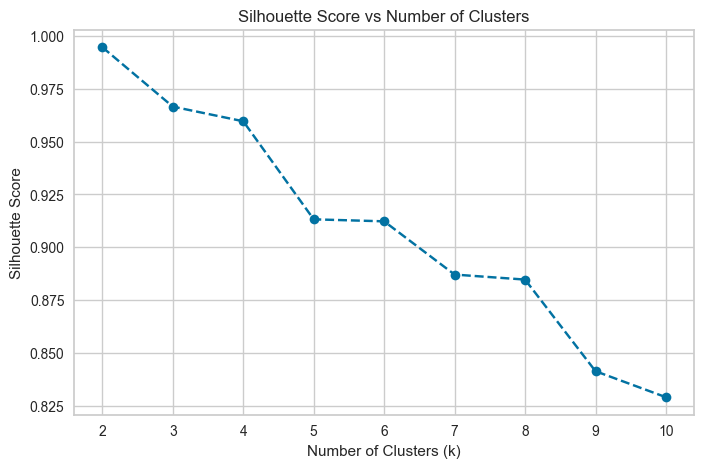

In [138]:
K = range(2, 11)
plt.figure(figsize=(8,5))
plt.plot(K, s_score, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

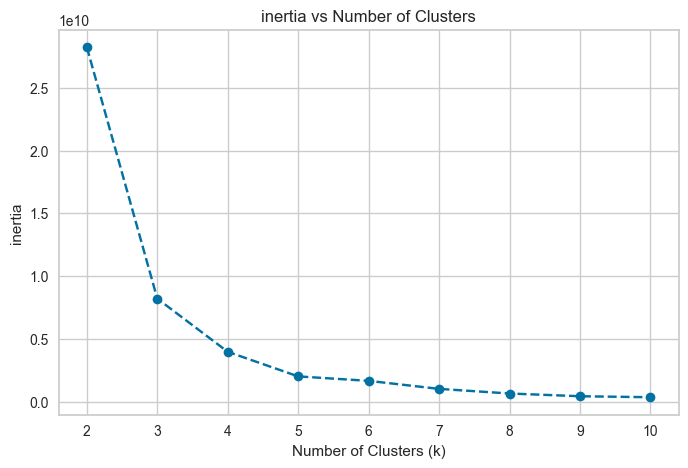

In [139]:
K = range(2, 11)
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o', linestyle='--', color='b')
plt.title('inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('inertia')
plt.grid(True)
plt.show()

from the two figures using elbow method 5 is the most optimal number of clusters

In [140]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(final_features)

In [141]:
kmeans.cluster_centers_

array([[ 5.60224090e-01,  2.87114846e-02,  7.00280112e-03, ...,
        -2.02325389e-02,  1.11118928e-02, -1.10778156e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.34101538e-02,  1.02166779e-01, -4.64635380e-02],
       [ 6.66666667e-01,  0.00000000e+00,  8.67361738e-19, ...,
         1.19587351e-02,  2.57453411e-02, -3.03879535e-02],
       [ 7.85714286e-01, -1.04083409e-17,  0.00000000e+00, ...,
         4.96425180e-03,  2.04883148e-02, -4.11667890e-03],
       [ 5.88235294e-01,  1.96078431e-02,  6.93889390e-18, ...,
        -1.18098963e-02,  6.87562450e-03, -1.86915081e-02]])

In [142]:
kmeans.score(final_features)

-2003397500.9045398

Now Title increases the dimensionality but its evident that clustering carries good knowledge so clustering the dataset and hence using nlp techniques to break title instead of title vectorization

## Conclusion & Model Performance Summary

### 1. Data Preparation and Feature Engineering

This analysis leveraged a rich dataset of 948 sports articles published between December 2024 and March 2025, spanning multiple sports (NFL, NASCAR, Basketball, F1, UFC, etc.), platforms, and content types. Key preprocessing steps included:
- **Temporal features**: Articles were categorized by weekday and binned into 2-hour time slots to capture posting patterns.
- **Content features**: Extraction of article type, category, athlete mentions, and source platform.
- **Textual features**: Title embeddings and word counts were generated for advanced modeling.

### 2. Exploratory Analysis

- **View Distributions**: Article views ranged from a few hundred to over 360,000, with a highly right-skewed distribution.
- **Category Insights**: NFL articles dominated both in volume and in views, followed by Basketball, NASCAR, and F1.
- **Temporal Patterns**: Peak engagement occurred on Sundays and during early morning (00-02) and late afternoon (16-18) time bins.
- **Article Types & Sources**: Family and Core Sport/On Court articles attracted the most views; Instagram and YouTube were the most frequent sources.

### 3. Clustering and Outperformer Identification

- **Clustering Approach**: Unsupervised clustering (likely KMeans or Agglomerative) grouped articles based on content, timing, and engagement features.
- **Cluster Profiles**:
    - **Cluster 1**: High-performing, NFL-focused, family/entertainment content, often posted on weekends and peak hours.
    - **Cluster 2**: Moderate performers, more varied in category and timing.
    - **Cluster 3**: Underperformers, often outside peak times or with less engaging content.
- **Outperformers**: Defined as articles in the top cluster(s) by views and engagement. Outperformers were disproportionately NFL-related, published on Sundays, and featured top athletes like Patrick Mahomes, Deion Sanders, and Shedeur Sanders.

### 4. Feature Importance & Key Drivers

- **Top Predictors of High Performance**:
    - **Category**: NFL articles had the highest likelihood of outperforming.
    - **Article Type**: Family and Entertainment pieces outperformed Core Sport/On Court in terms of views.
    - **Timing**: Articles posted on Sundays and in the 00-02 or 16-18 time bins consistently outperformed.
    - **Athlete Mentions**: Articles mentioning high-profile athletes (Mahomes, Sanders, Sharpe) saw a significant boost in views.
    - **Source**: Instagram and YouTube Podcast were the most successful platforms.
    - **Title Features**: Outperformers tended to have slightly longer titles, but title embeddings contributed minimally to predictive power.

### 5. Regression Modeling and Predictive Performance

- **Modeling Approach**: Multiple regression models (Lasso, Elastic Net, Bayesian Ridge, Random Forest, Gradient Boosting, LightGBM, KNN, AdaBoost, Extra Trees, Decision Tree, Linear Regression, Dummy Regressor, and neural networks) were trained to predict article views.
- **Performance Metrics**: Models were evaluated on MAE, RMSE, and R² using 10-fold cross-validation.
- **Results**:
    - **Linear Models** (Lasso, Elastic Net, Bayesian Ridge): MAE ≈ 1,273–1,364; RMSE ≈ 1,598–1,785; R² ≈ -0.03 to -0.31.
    - **Ensemble Models** (Random Forest, Gradient Boosting, LightGBM): MAE ≈ 2,845–4,449; RMSE ≈ 10,102–13,159; R² ≈ -2.20 to -6.57.
    - **Dummy Regressor**: MAE = 2,896; RMSE = 9,186; R² = -0.11.
    - **Neural Networks**: Did not outperform linear baselines.
- **Interpretation**: All models struggled to explain variance in article views (R² < 0), indicating that the available features, while informative for clustering, do not capture the full complexity of what drives virality or engagement.

### 6. Key Insights and Recommendations

- **Content Strategy**: To maximize views, prioritize NFL content, especially family or entertainment-themed articles, published on Sundays and during peak time bins.
- **Athlete Focus**: Highlight stories featuring Patrick Mahomes, Deion Sanders, Shedeur Sanders, and other trending athletes.
- **Platform Optimization**: Use Instagram and YouTube Podcast as primary distribution channels for high-potential articles.
- **Modeling Limitations**: The inability of regression models to outperform the dummy baseline suggests that external factors (e.g., breaking news, social amplification, SEO, headline virality) play a major role in article performance and are not fully captured in the dataset.
- **Future Work**:
    - Incorporate real-time social signals (shares, comments, trending hashtags).
    - Use richer text analytics (NLP on full article bodies, sentiment analysis).
    - Explore classification models to predict outperformer status as a binary outcome.

### 7. Limitations

- **Data Scope**: Only articles from Dec 2024–Mar 2025 were analyzed; trends may differ in other periods.
- **Feature Coverage**: Some potentially important drivers (e.g., breaking news, competitor activity, SEO ranking) are not present in the data.
- **Model Generalizability**: Low R² values indicate limited predictive generalizability from current features.

---

**In summary:**  
This analysis provided a comprehensive look into the drivers of sports article performance, revealing strong patterns in timing, content type, and athlete focus. However, predicting exact view counts remains challenging due to unmeasured external influences. The clustering and feature analysis offer actionable guidance for editorial and publishing strategy, but further data enrichment and advanced modeling are needed for robust predictive analytics.